In [2]:
import glob

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('../style.mplstyle')

In [3]:
dirs = glob.glob('./fa24/*', recursive=True)
dirs

['./fa24/baseline_data', './fa24/killer_b_baffle_prefilter']

# Load data

In [4]:
df_baseline = pd.read_csv('./fa24/baseline_data/2023-05-22_Thunderhill_5-Mile_Double_Bypass/jmg_2022-subaru-brz-THill_5Mi_BY_a_0060_clean.csv')
df_baffle = pd.read_csv('./fa24/killer_b_baffle_prefilter/2023-07-01_Thunderhill_5-Mile_West_Bypass/jmg-2022-subaru-brz-THill_5mi_BY_a_0080_clean.csv')

bl_markers =  [0, 149.31, 366.541, 575.518, 785.78, 1111]
baffle_markers = [0, 602.831, 823.214, 1035.59, 1247.72, 1461.19, 1826]

baseline_sessions = {}
for i in range(len(bl_markers)-1):
    baseline_sessions[i] =  df_baseline.loc[(df_baseline['Time'] >= bl_markers[i]) &\
                                            (df_baseline['Time'] <= bl_markers[i+1])].copy()

baffle_sessions = {}
for i in range(len(bl_markers)-1):
    baffle_sessions[i] =  df_baffle.loc[(df_baffle['Time'] >= baffle_markers[i]) &\
                                        (df_baffle['Time'] <= baffle_markers[i+1])].copy()

In [5]:
def get_best_session(markers):
    # skip the first session
    lengths = [markers[i+1]-markers[i] for i in range(1,len(markers)-1)]
    return np.where(lengths == np.min(lengths))[0][0]+1

In [6]:
bl_session_best = get_best_session(bl_markers)
baffle_session_best = get_best_session(baffle_markers)

In [7]:
print(bl_session_best)
print(baffle_session_best)

2
3


In [7]:
# only 1st baffled session has full lap?no data after session 4
baffle_session_best = 1

# All scatter

In [8]:
vars = [
    'GPS Speed', 'GPS LatAcc', 'GPS LonAcc',
    'GPS Slope', 'GPS Heading', 'GPS Gyro', 'GPS Altitude',
    'GPS PosAccuracy','GPS Radius', 'GPS Latitude',
    'GPS Longitude', 'MagnetomX', 'MagnetomY', 'MagnetomZ',
    'InlineAcc', 'LateralAcc',
    'VerticalAcc', 'RollRate', 'PitchRate', 'YawRate', 'RPM', 'PPS',
    'SteerAngle', 'BrakePress', 'SpeedV', 'OilTemp', 'ECT',
]

len(vars)

27

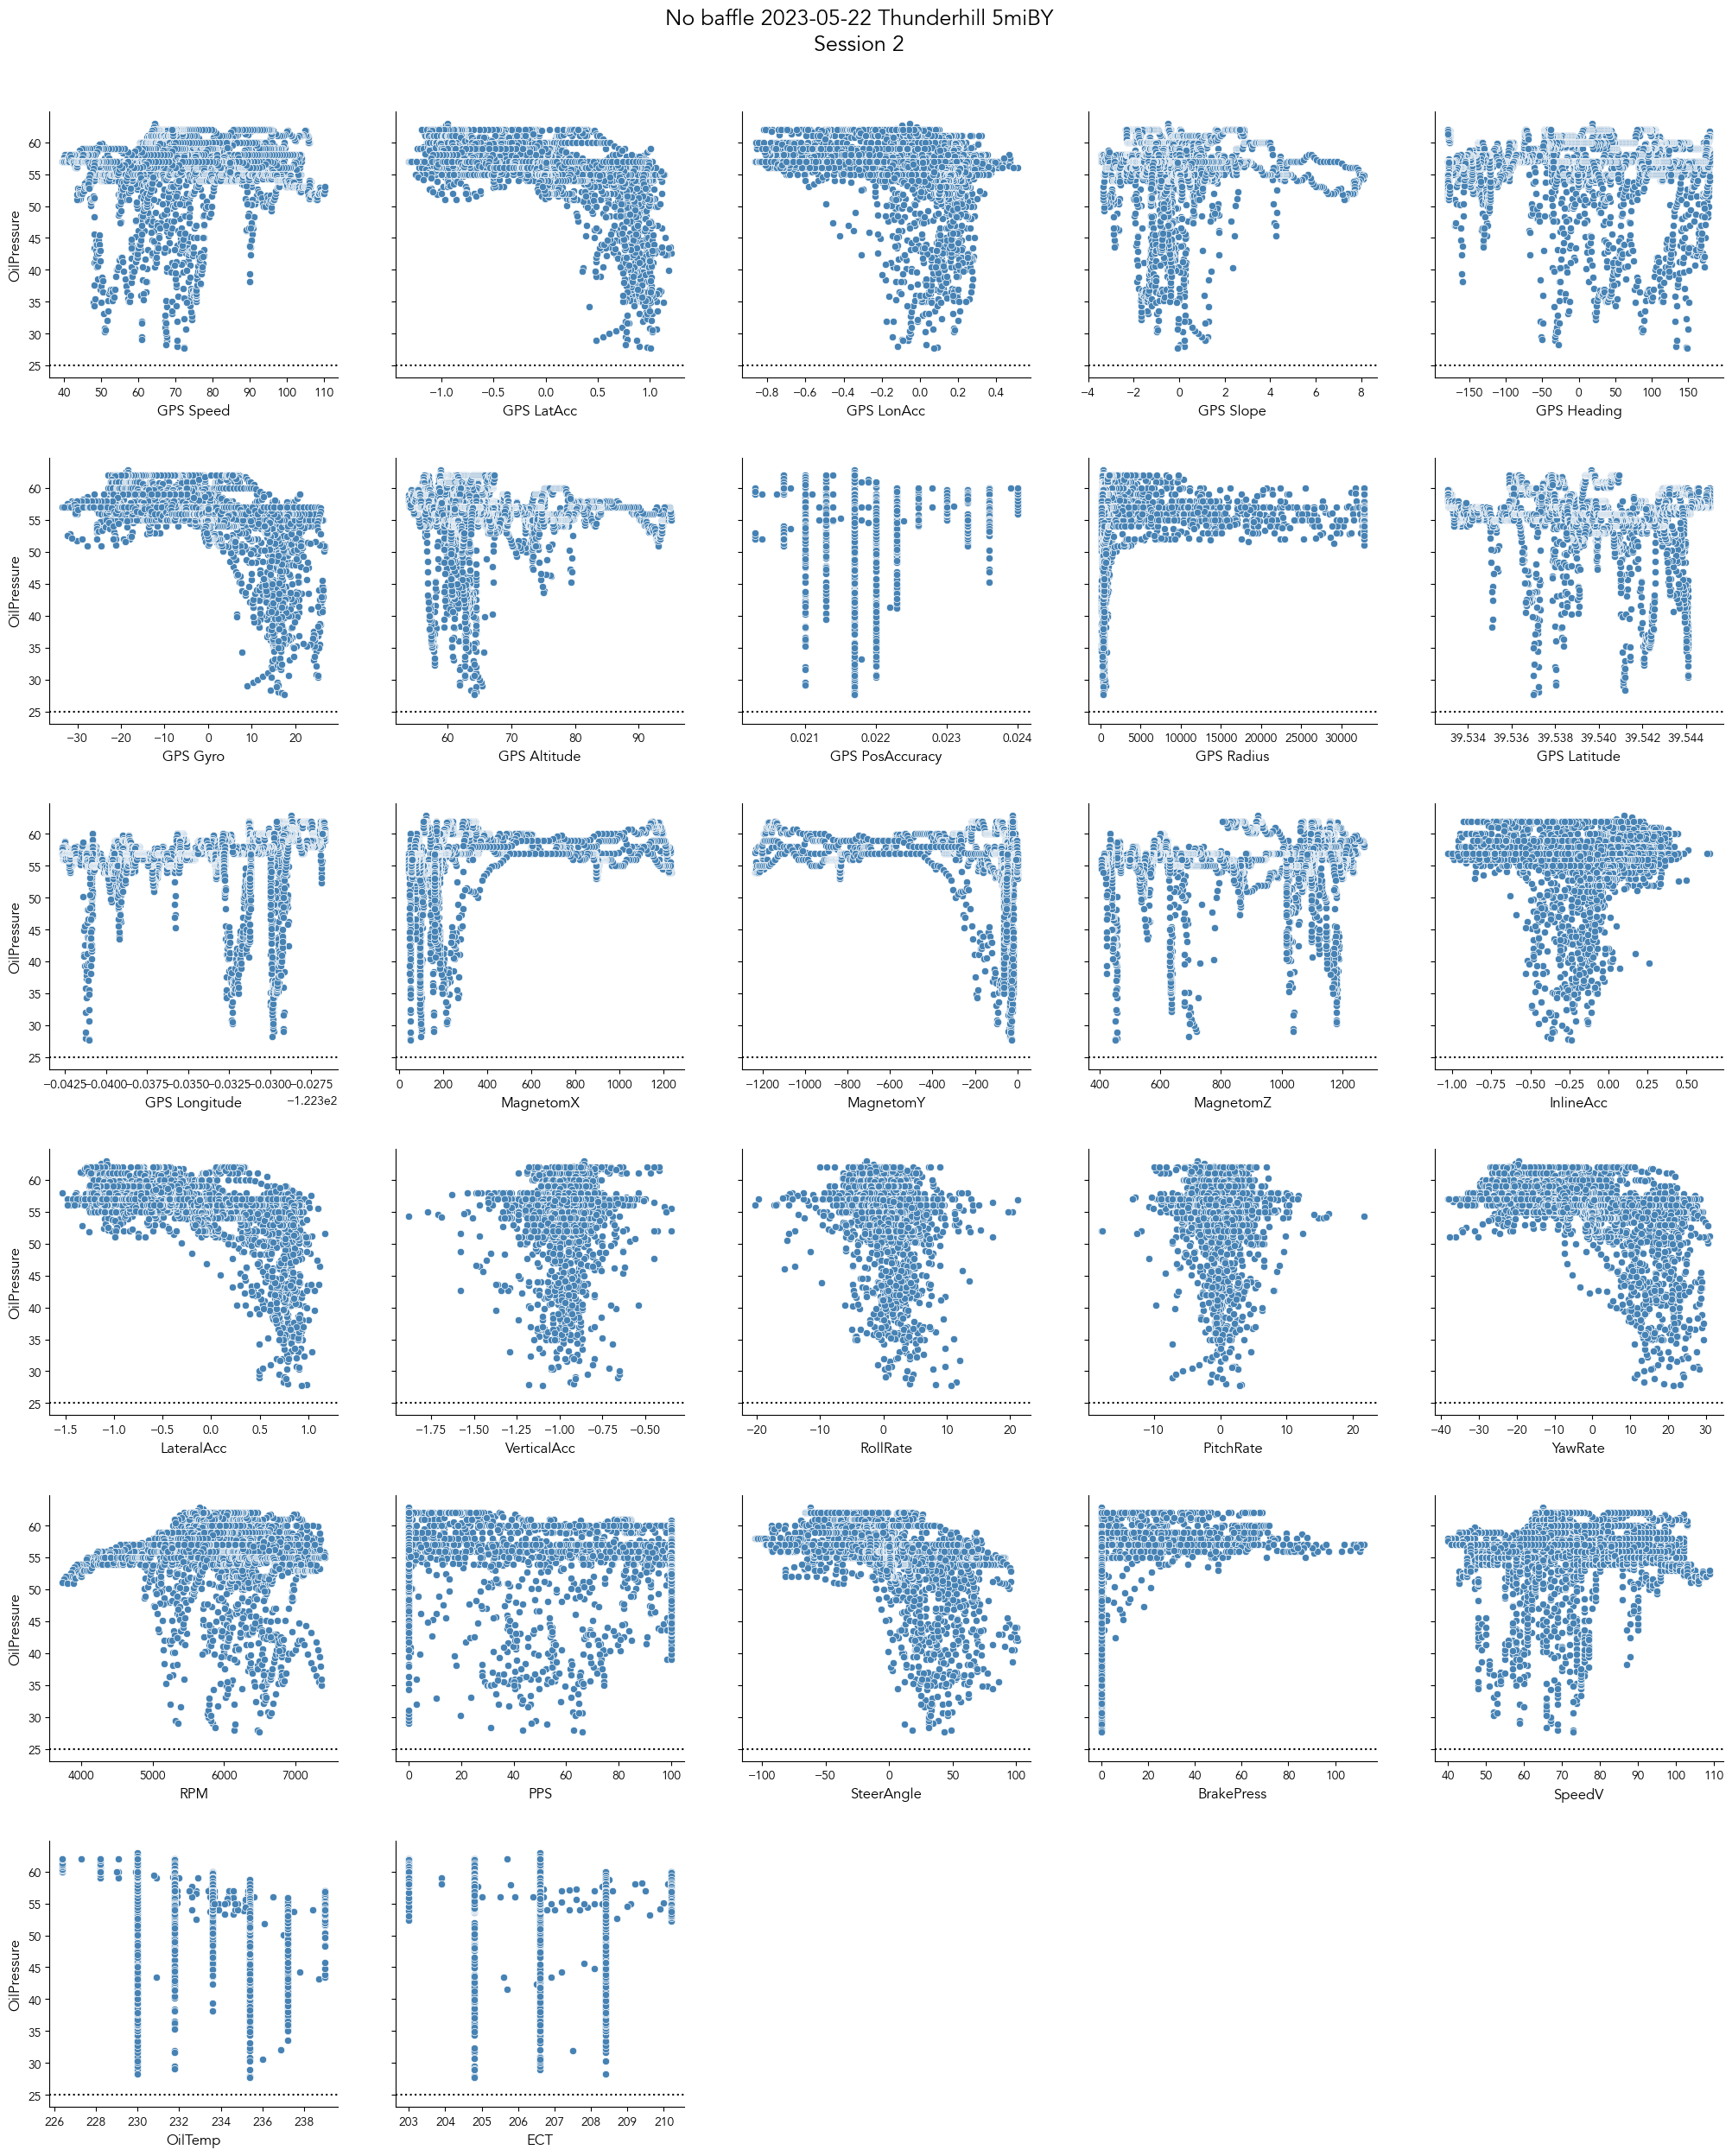

In [9]:
data = baseline_sessions[bl_session_best]
yvar = 'OilPressure'

ncols = 5
nrows = int(np.ceil(len(vars) / ncols))

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5), sharey=True)
axl = ax.flatten()
for idx, v in enumerate(vars):
    a = axl[idx]
    sns.scatterplot(ax = a, x = v, y = yvar, data = data, color='steelblue')
    a.axhline(y=25, ls = ':', color = 'k')
for i in range(idx+1, ncols*nrows):
    fig.delaxes(axl[i])
fig.suptitle(f'No baffle 2023-05-22 Thunderhill 5miBY\nSession {bl_session_best}', fontsize=18, y=0.92)
fig.subplots_adjust(hspace=0.3)
plt.savefig('./figures/baseline-all_scatter.png', bbox_inches='tight', facecolor='w')
plt.show()

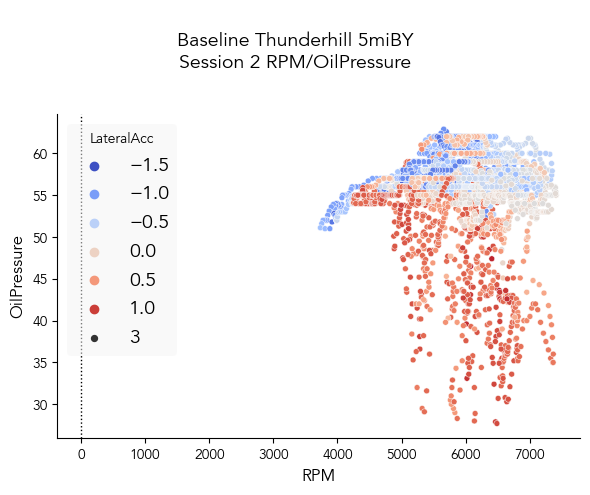

In [10]:
data = baseline_sessions[bl_session_best]

xvar = 'RPM'
yvar = 'OilPressure'

hue = 'LateralAcc'

fig, ax = plt.subplots(figsize=(6,5))

sns.scatterplot(ax = ax, x = xvar, y = yvar, data = data, size=3,
                hue = hue, palette='coolwarm')
#ax.set_xlim([-40,40])
ax.axvline(x=0, ls=':', lw=1, color='k')

title=f"""
Baseline Thunderhill 5miBY\nSession {bl_session_best} {xvar}/{yvar}
"""

fig.suptitle(title, fontsize=14)
fig.tight_layout()
fig.savefig(f'./figures/baseline-scatter_{xvar}-{yvar}-by-{hue}.png', bbox_inches='tight', facecolor='w')
plt.show()

# Baffled vs Unbaffled

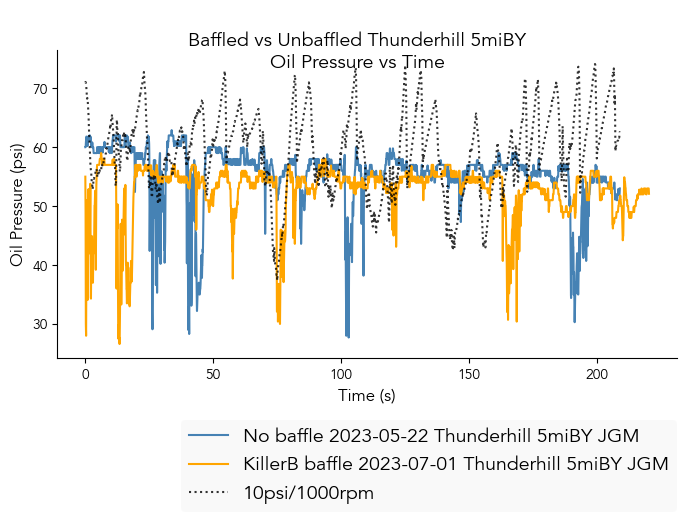

In [11]:
baseline = baseline_sessions[bl_session_best].copy()
baffle = baffle_sessions[baffle_session_best].copy()

baseline['Time_r'] = baseline['Time'] - baseline['Time'].min()
baffle['Time_r'] = baffle['Time'] - baffle['Time'].min()

fig, ax = plt.subplots(figsize=(8,4))

baseline_lab = 'No baffle 2023-05-22 Thunderhill 5miBY JGM'
baffle_lab = 'KillerB baffle 2023-07-01 Thunderhill 5miBY JGM'

psi_rate = 100

sns.lineplot(ax = ax, x = 'Time_r', y = 'OilPressure', data = baseline, color='steelblue', label = baseline_lab)
sns.lineplot(ax = ax, x = 'Time_r', y = 'OilPressure', data = baffle, color='orange', label = baffle_lab)
ax.plot(baseline['Time_r'].values,
        baseline['RPM'].values/psi_rate, color = 'k', ls =':',
        alpha=0.8, label='10psi/1000rpm')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Oil Pressure (psi)')
ax.legend(loc=(0.2,-0.5))
title=f"""
Baffled vs Unbaffled Thunderhill 5miBY
Oil Pressure vs Time
"""
fig.suptitle(title, fontsize=14)
fig.savefig(f'./figures/baffled_vs_unbaffled_OPxTime.png', bbox_inches='tight', facecolor='w')
plt.show()

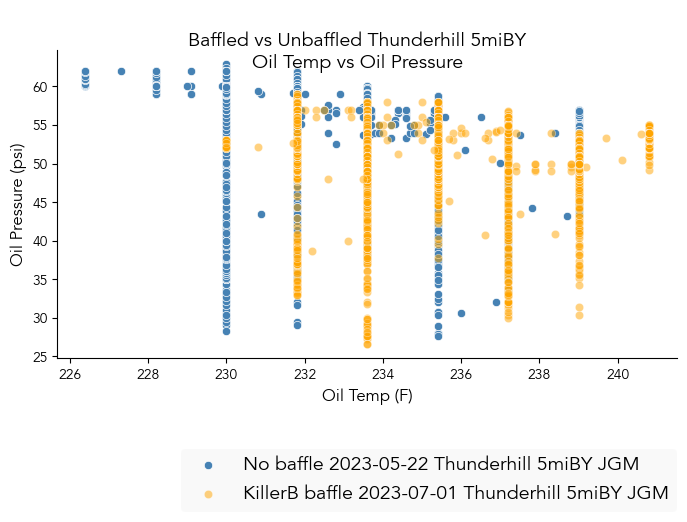

In [12]:
baseline = baseline_sessions[bl_session_best].copy()
baffle = baffle_sessions[baffle_session_best].copy()

baseline['Time_r'] = baseline['Time'] - baseline['Time'].min()
baffle['Time_r'] = baffle['Time'] - baffle['Time'].min()

fig, ax = plt.subplots(figsize=(8,4))

baseline_lab = 'No baffle 2023-05-22 Thunderhill 5miBY JGM'
baffle_lab = 'KillerB baffle 2023-07-01 Thunderhill 5miBY JGM'

psi_rate = 100

sns.scatterplot(ax = ax, x = 'OilTemp', y = 'OilPressure', data = baseline, color='steelblue', label = baseline_lab)
sns.scatterplot(ax = ax, x = 'OilTemp', y = 'OilPressure', data = baffle, color='orange', label = baffle_lab,
               alpha=0.5)
ax.set_xlabel('Oil Temp (F)')
ax.set_ylabel('Oil Pressure (psi)')
ax.legend(loc=(0.2,-0.5))
title=f"""
Baffled vs Unbaffled Thunderhill 5miBY
Oil Temp vs Oil Pressure
"""
fig.suptitle(title, fontsize=14)
fig.savefig(f'./figures/baffled_vs_unbaffled_OPxOT.png', bbox_inches='tight', facecolor='w')
plt.show()

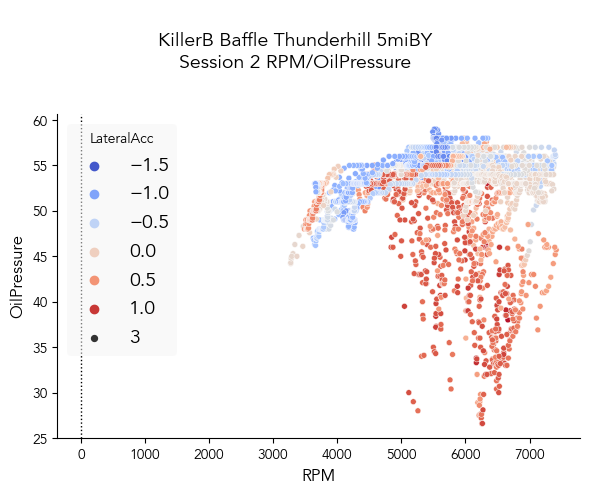

In [13]:
data = baffle_sessions[baffle_session_best]

xvar = 'RPM'
yvar = 'OilPressure'

hue = 'LateralAcc'

fig, ax = plt.subplots(figsize=(6,5))

sns.scatterplot(ax = ax, x = xvar, y = yvar, data = data, size=3,
                hue = hue, palette='coolwarm')
#ax.set_xlim([-40,40])
ax.axvline(x=0, ls=':', lw=1, color='k')

title=f"""
KillerB Baffle Thunderhill 5miBY\nSession {bl_session_best} {xvar}/{yvar}
"""

fig.suptitle(title, fontsize=14)
fig.tight_layout()
fig.savefig(f'./figures/baffled-scatter_{xvar}-{yvar}-by-{hue}.png', bbox_inches='tight', facecolor='w')
plt.show()

# Var x time

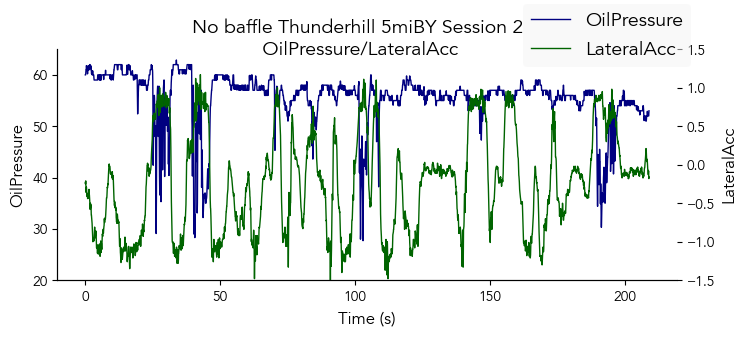

In [14]:
baseline = baseline_sessions[bl_session_best]
baseline['Time_r'] = baseline['Time'] - baseline['Time'].min()

xvar = 'Time_r'
yvar1 = 'OilPressure'
yvar2 = 'LateralAcc'

fig, ax = plt.subplots(figsize=(8,3))

sns.lineplot(ax = ax, x = xvar, y = yvar1, data = baseline,
             color='navy', lw=1, label = yvar1, legend=False)
ax.set_ylim([20,65])

ax2 = ax.twinx()
sns.lineplot(ax = ax2, x = xvar, y = yvar2, data = baseline,
             color='darkgreen', lw=1, label = yvar2, legend=False)
ax2.set_ylim([-1.5,1.5])
ax.set_xlabel('Time (s)')
fig.legend(loc=(0.7,0.8))
fig.suptitle(f'No baffle Thunderhill 5miBY Session {bl_session_best}\n {yvar1}/{yvar2}', fontsize=14)
fig.savefig(f'./figures/baseline_{yvar1}-{yvar2}-x-time.png', bbox_inches='tight', facecolor='w')
plt.show()

# GPS

## No Baffle

In [15]:
data = baseline_sessions[bl_session_best]
gpd_baseline = gpd.GeoDataFrame(data = data,
                                geometry = gpd.points_from_xy(data['GPS Longitude'], data['GPS Latitude']))

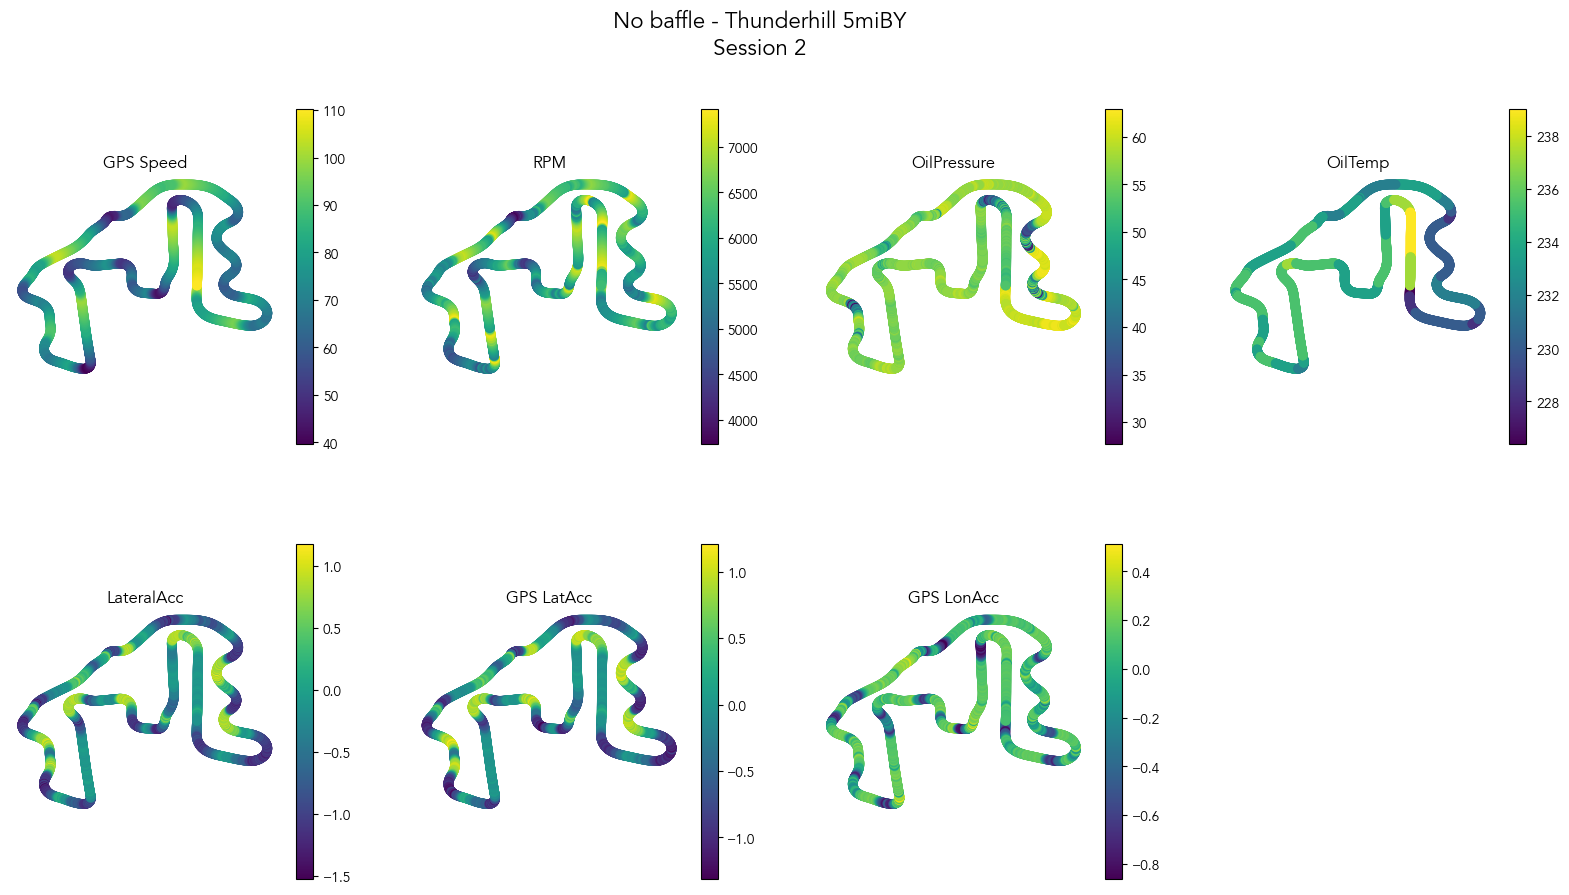

In [16]:
vars = [
    'GPS Speed', 'RPM', 'OilPressure', 'OilTemp', 
    'LateralAcc', 'GPS LatAcc', 'GPS LonAcc',
]


fig, ax = plt.subplots(2,4, figsize=(20,10))
axl = ax.flatten()

for idx, v in enumerate(vars):
    a = axl[idx]
    gpd_baseline.plot(ax = a,
                      column = v,
                      cmap='viridis',
                      legend=True)
    a.axis('off')
    a.set_title(v)
for i in range(idx+1, 8):
    fig.delaxes(axl[i])
fig.subplots_adjust(hspace=0.3)
fig.suptitle(f'No baffle - Thunderhill 5miBY\nSession {bl_session_best}', fontsize=16)
fig.savefig('./figures/baseline-gps-pos.png', bbox_inches='tight', facecolor='w')
pass

### Low Pressure Zones

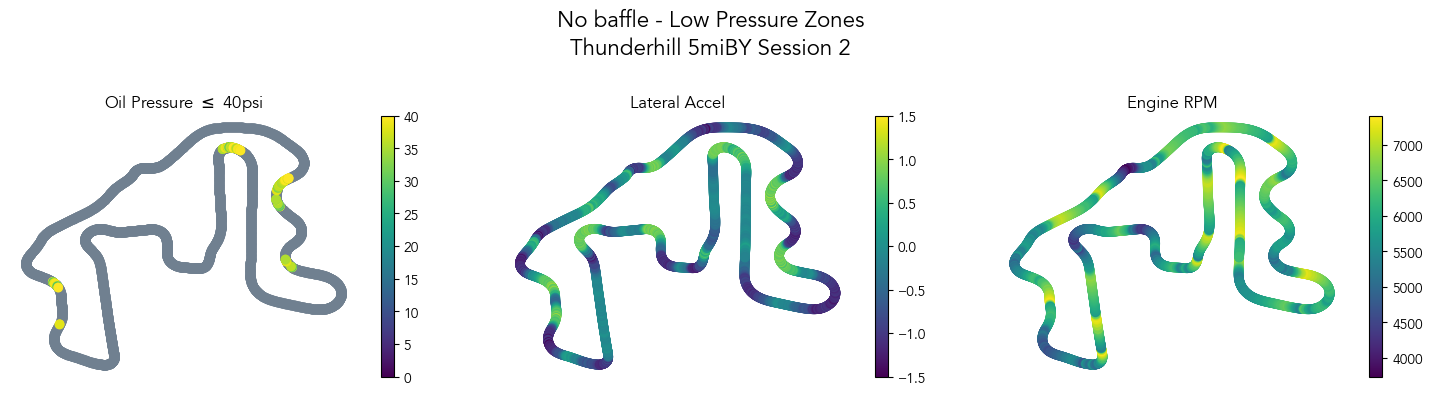

In [17]:
lp = gpd_baseline.loc[gpd_baseline['OilPressure'] <=40]
hp = gpd_baseline.loc[gpd_baseline['OilPressure'] >40]
labels = ['Oil Pressure $\leq$ 40psi', 'Lateral Accel', 'Engine RPM']

fig, ax = plt.subplots(1, 3, figsize=(15,4))
axl = ax.flatten()

a = axl[0]
var = 'OilPressure'
label = 'Oil Pressure $\leq$ 40psi'
vmin = 0
vmax = 40
hp.plot(ax = a, color='slategrey')
lp.plot(ax = a, column = var, cmap='viridis', vmin=vmin, vmax=vmax, legend=True)
a.axis('off')
a.set_title(labels[0])

a = axl[1]
var = 'LateralAcc'
label = 'Lateral Acceleration (g)'
vmin = -1.5
vmax = 1.5
gpd_baseline.plot(ax = a, column = var, cmap='viridis', vmin=vmin, vmax=vmax, legend=True)
a.axis('off')
a.set_title(labels[1])

a = axl[2]
var = 'RPM'
label = 'RPM'
gpd_baseline.plot(ax = a, column = var, cmap='viridis',legend=True)
a.axis('off')
a.set_title(labels[2])

title=f"""No baffle - Low Pressure Zones
Thunderhill 5miBY Session {bl_session_best}
"""
fig.suptitle(title, fontsize=16)
fig.tight_layout()
fig.savefig('./figures/baseline-low-pressure-zone.png', bbox_inches='tight', facecolor='w')
pass

## Baffle

In [18]:
baffle_session_best

1

In [19]:
data = baffle_sessions[baffle_session_best]
gpd_baffle = gpd.GeoDataFrame(data = data,
                              geometry = gpd.points_from_xy(data['GPS Longitude'], data['GPS Latitude']))

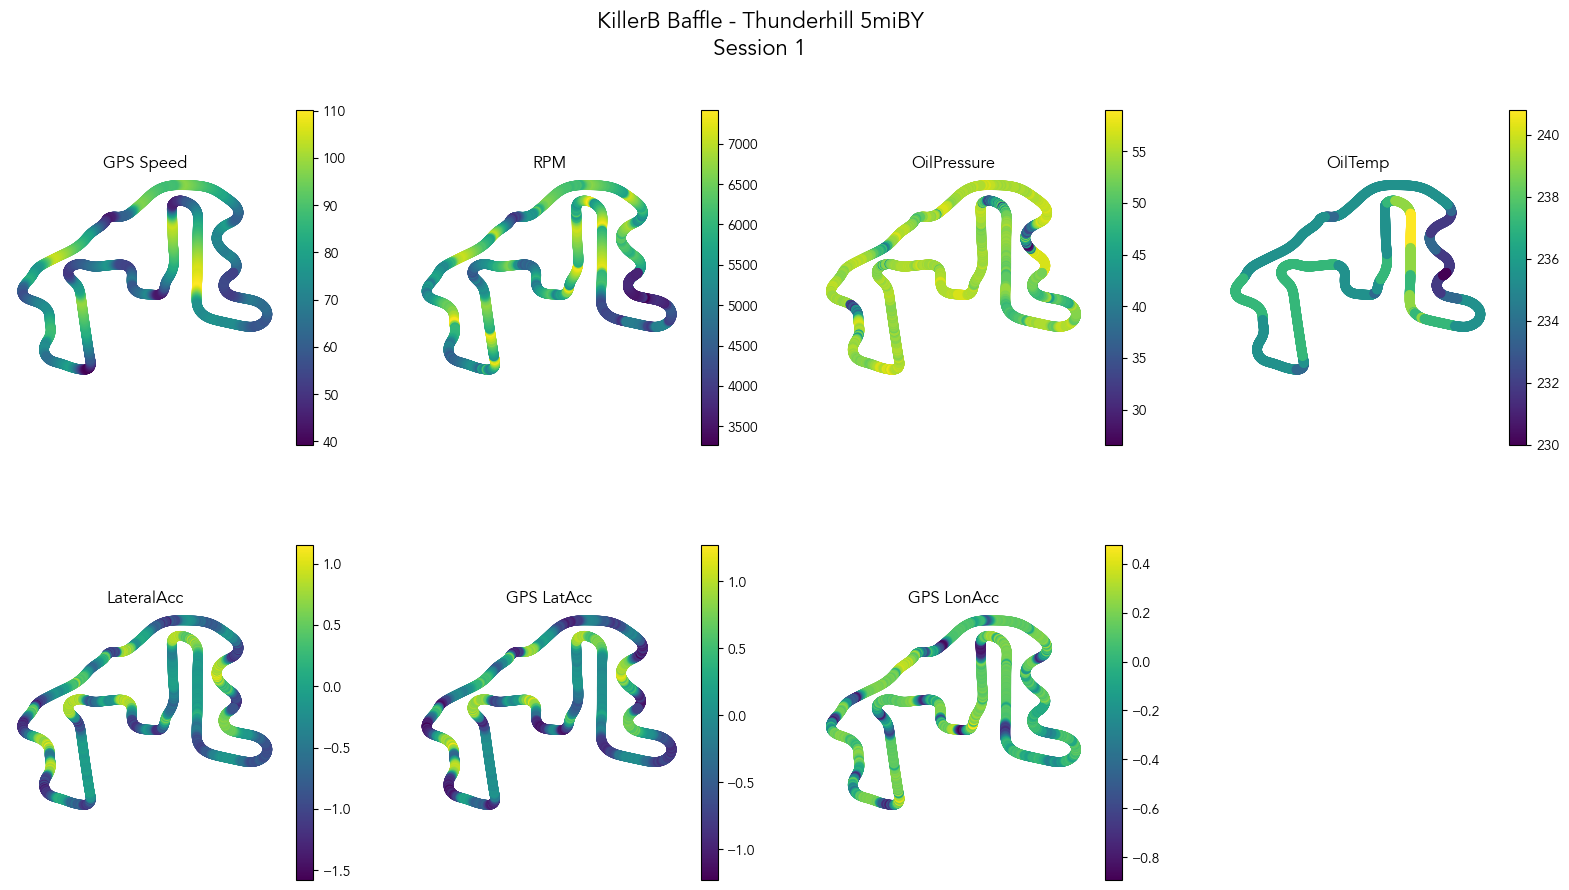

In [20]:
vars = [
    'GPS Speed', 'RPM', 'OilPressure', 'OilTemp', 
    'LateralAcc', 'GPS LatAcc', 'GPS LonAcc',
]


fig, ax = plt.subplots(2,4, figsize=(20,10))
axl = ax.flatten()

for idx, v in enumerate(vars):
    a = axl[idx]
    gpd_baffle.plot(ax = a,
                    column = v,
                    cmap='viridis',
                    legend=True)
    a.axis('off')
    a.set_title(v)
for i in range(idx+1, 8):
    fig.delaxes(axl[i])
fig.subplots_adjust(hspace=0.3)
fig.suptitle(f'KillerB Baffle - Thunderhill 5miBY\nSession {baffle_session_best}', fontsize=16)
fig.savefig('./figures/baffled-gps-pos.png', bbox_inches='tight', facecolor='w')
pass

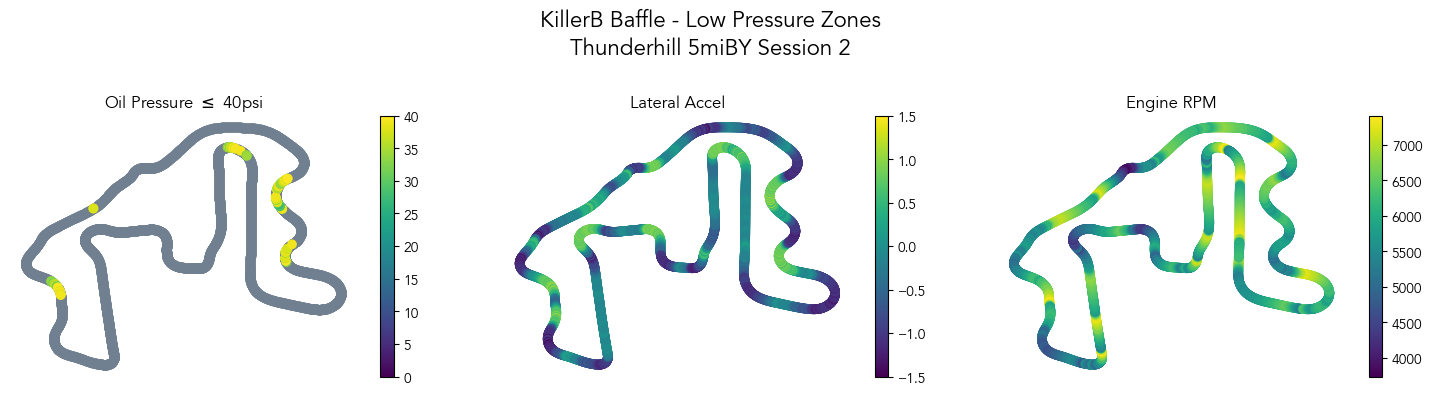

In [21]:
lp = gpd_baffle.loc[gpd_baffle['OilPressure'] <=40]
hp = gpd_baffle.loc[gpd_baffle['OilPressure'] >40]
labels = ['Oil Pressure $\leq$ 40psi', 'Lateral Accel', 'Engine RPM']

fig, ax = plt.subplots(1, 3, figsize=(15,4))
axl = ax.flatten()

a = axl[0]
var = 'OilPressure'
label = 'Oil Pressure $\leq$ 40psi'
vmin = 0
vmax = 40
hp.plot(ax = a, color='slategrey')
lp.plot(ax = a, column = var, cmap='viridis', vmin=vmin, vmax=vmax, legend=True)
a.axis('off')
a.set_title(labels[0])

a = axl[1]
var = 'LateralAcc'
label = 'Lateral Acceleration (g)'
vmin = -1.5
vmax = 1.5
gpd_baseline.plot(ax = a, column = var, cmap='viridis', vmin=vmin, vmax=vmax, legend=True)
a.axis('off')
a.set_title(labels[1])

a = axl[2]
var = 'RPM'
label = 'RPM'
gpd_baseline.plot(ax = a, column = var, cmap='viridis',legend=True)
a.axis('off')
a.set_title(labels[2])

title=f"""KillerB Baffle - Low Pressure Zones
Thunderhill 5miBY Session {bl_session_best}
"""
fig.suptitle(title, fontsize=16)
fig.tight_layout()
fig.savefig('./figures/baffled-low-pressure-zone.png', bbox_inches='tight', facecolor='w')
pass

<AxesSubplot: xlabel='GPS Longitude', ylabel='GPS Latitude'>

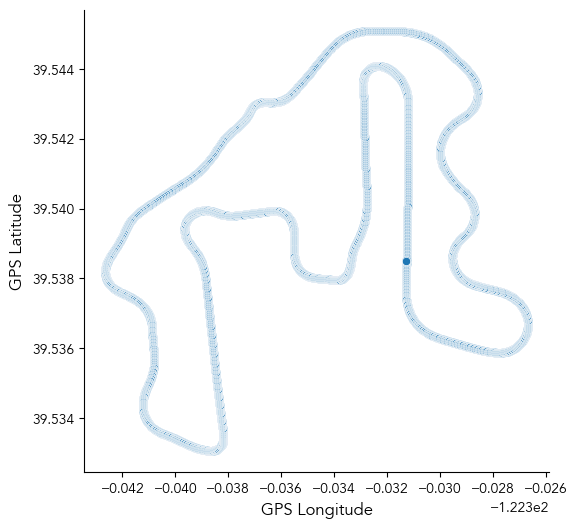

In [11]:
sns.scatterplot(y = 'GPS Latitude', x = 'GPS Longitude', data = data)

# High vs low

In [12]:
high = df_baffle.loc[df_baffle['OilPressure'] > 40]
low = df_baffle.loc[df_baffle['OilPressure'] <= 40]

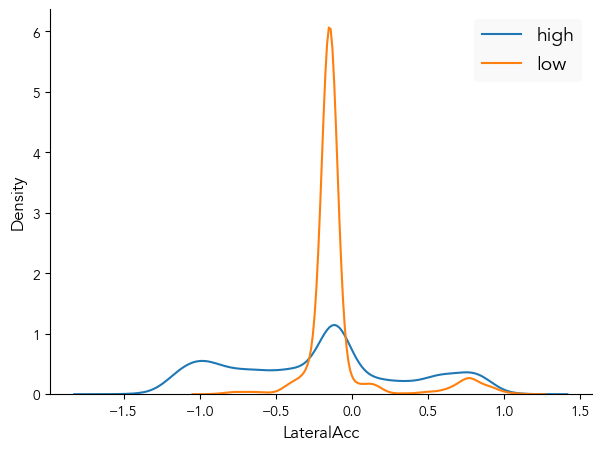

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
sns.kdeplot(ax = ax, x = 'LateralAcc', data = high,label='high')
sns.kdeplot(ax = ax, x = 'LateralAcc', data = low, label='low')
ax.legend()
pass

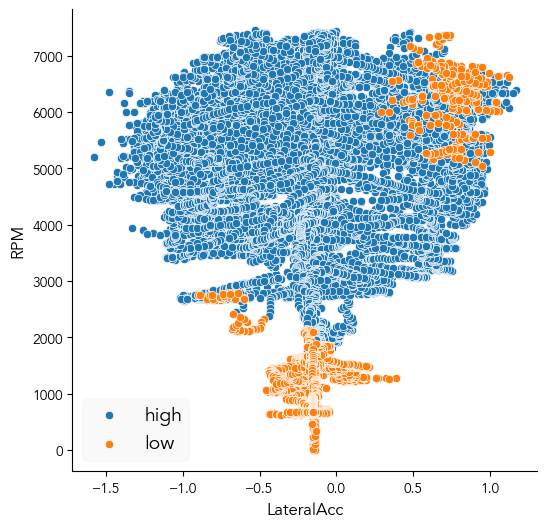

In [18]:
sns.scatterplot(y = 'RPM', x = 'LateralAcc', data = high, label='high')
sns.scatterplot(y = 'RPM', x = 'LateralAcc', data = low, label='low')
plt.legend()
pass